# Keras TF 2.0 - Classification Project on Cancer Data

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/shmhatre/Desktop/Udemy/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/TensorFlow_FILES/ANNs/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Exploratory Data Analysis

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

### Check the balace of the data

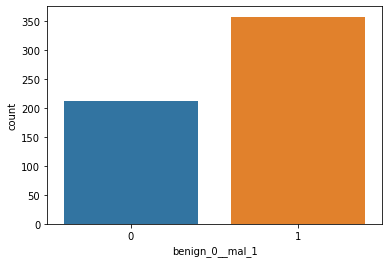

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

### Check the correlation of the features

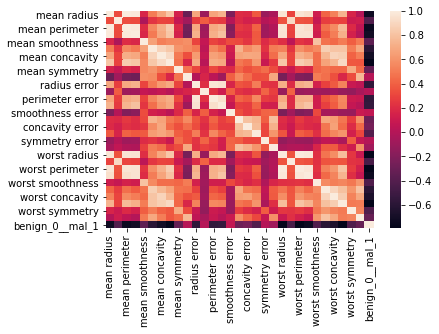

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

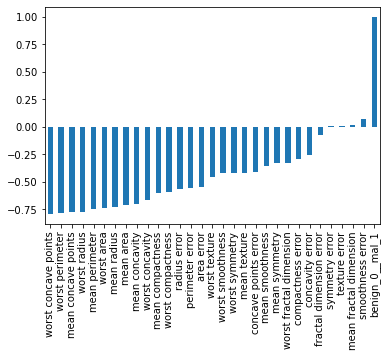

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

### Dropping the label (Plotting the other features)

### From graph it indiocated that the features are negativelty correlated

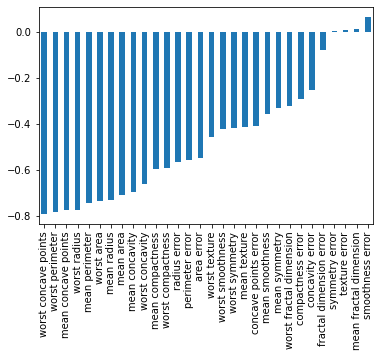

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

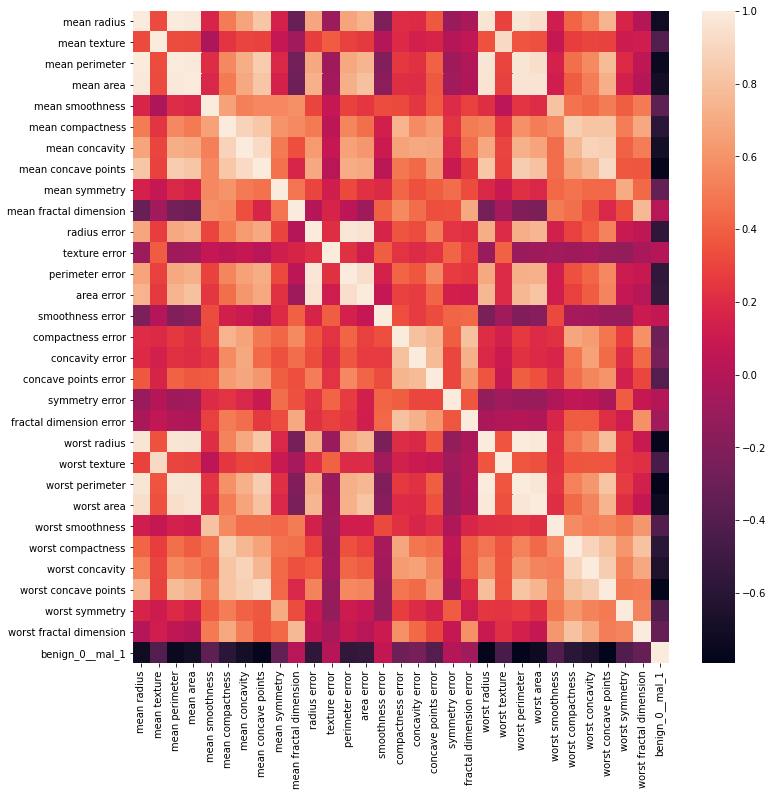

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

## Train Test Split

In [12]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.33, random_state=42)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101)


## Scaling Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [21]:
X_train.shape

(426, 30)

In [22]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [23]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6820 - val_loss: 0.6667
Epoch 2/600
426/426 [==============================] - 0s 69us/sample - loss: 0.6568 - val_loss: 0.6410
Epoch 3/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6248 - val_loss: 0.6042
Epoch 4/600
426/426 [==============================] - 0s 71us/sample - loss: 0.5868 - val_loss: 0.5639
Epoch 5/600
426/426 [==============================] - 0s 72us/sample - loss: 0.5442 - val_loss: 0.5156
Epoch 6/600
426/426 [==============================] - 0s 75us/sample - loss: 0.4937 - val_loss: 0.4633
Epoch 7/600
426/426 [==============================] - 0s 71us/sample - loss: 0.4403 - val_loss: 0.4071
Epoch 8/600
426/426 [==============================] - 0s 71us/sample - loss: 0.3908 - val_loss: 0.3585
Epoch 9/600
426/426 [==============================] - 0s 73us/sample - loss: 0.3460 - val_loss: 0.3138
Epoch 10/600
426/42

426/426 [==============================] - 0s 68us/sample - loss: 0.0537 - val_loss: 0.1267
Epoch 79/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0573 - val_loss: 0.1333
Epoch 80/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0542 - val_loss: 0.1290
Epoch 81/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0538 - val_loss: 0.1248
Epoch 82/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0530 - val_loss: 0.1329
Epoch 83/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0524 - val_loss: 0.1258
Epoch 84/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0567 - val_loss: 0.1340
Epoch 85/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0537 - val_loss: 0.1241
Epoch 86/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0528 - val_loss: 0.1318
Epoch 87/600
426/426 [==============================] - 0s 67us/samp

426/426 [==============================] - 0s 66us/sample - loss: 0.0416 - val_loss: 0.1630
Epoch 156/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0414 - val_loss: 0.1442
Epoch 157/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0500 - val_loss: 0.1809
Epoch 158/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0473 - val_loss: 0.1453
Epoch 159/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0429 - val_loss: 0.1574
Epoch 160/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0412 - val_loss: 0.1579
Epoch 161/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0425 - val_loss: 0.1556
Epoch 162/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0412 - val_loss: 0.1560
Epoch 163/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0406 - val_loss: 0.1562
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 70us/sample - loss: 0.0338 - val_loss: 0.1712
Epoch 233/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0326 - val_loss: 0.1755
Epoch 234/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0351 - val_loss: 0.1733
Epoch 235/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0327 - val_loss: 0.1716
Epoch 236/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0327 - val_loss: 0.1782
Epoch 237/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0323 - val_loss: 0.1601
Epoch 238/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0345 - val_loss: 0.1872
Epoch 239/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0372 - val_loss: 0.1662
Epoch 240/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0350 - val_loss: 0.1819
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 67us/sample - loss: 0.0267 - val_loss: 0.1879
Epoch 310/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0267 - val_loss: 0.1903
Epoch 311/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0294 - val_loss: 0.2032
Epoch 312/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0298 - val_loss: 0.1808
Epoch 313/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0258 - val_loss: 0.1966
Epoch 314/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0261 - val_loss: 0.1857
Epoch 315/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0271 - val_loss: 0.1816
Epoch 316/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0295 - val_loss: 0.2113
Epoch 317/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0269 - val_loss: 0.1861
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 67us/sample - loss: 0.0208 - val_loss: 0.2058
Epoch 387/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0202 - val_loss: 0.2083
Epoch 388/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0212 - val_loss: 0.2170
Epoch 389/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0220 - val_loss: 0.2261
Epoch 390/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0221 - val_loss: 0.2076
Epoch 391/600
426/426 [==============================] - 0s 69us/sample - loss: 0.0201 - val_loss: 0.2121
Epoch 392/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0196 - val_loss: 0.2180
Epoch 393/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0217 - val_loss: 0.1991
Epoch 394/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0210 - val_loss: 0.2172
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 66us/sample - loss: 0.0174 - val_loss: 0.2413
Epoch 464/600
426/426 [==============================] - 0s 69us/sample - loss: 0.0158 - val_loss: 0.2373
Epoch 465/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0158 - val_loss: 0.2356
Epoch 466/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0166 - val_loss: 0.2278
Epoch 467/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0167 - val_loss: 0.2613
Epoch 468/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0194 - val_loss: 0.2384
Epoch 469/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0157 - val_loss: 0.2511
Epoch 470/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0178 - val_loss: 0.2456
Epoch 471/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0220 - val_loss: 0.2351
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 67us/sample - loss: 0.0146 - val_loss: 0.2783
Epoch 541/600
426/426 [==============================] - 0s 67us/sample - loss: 0.0159 - val_loss: 0.2447
Epoch 542/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0141 - val_loss: 0.2932
Epoch 543/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0138 - val_loss: 0.2528
Epoch 544/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0164 - val_loss: 0.3260
Epoch 545/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0208 - val_loss: 0.2462
Epoch 546/600
426/426 [==============================] - 0s 69us/sample - loss: 0.0124 - val_loss: 0.2967
Epoch 547/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0140 - val_loss: 0.2474
Epoch 548/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0139 - val_loss: 0.2744
Epoch 549/600
426/426 [==============================] - 0s 

In [24]:
#model.history.history

In [25]:
model_loss = pd.DataFrame(model.history.history)

In [26]:
model_loss

,loss,val_loss
0,0.681977,0.666723
1,0.656819,0.640979
2,0.624821,0.604175
3,0.586810,0.563874
4,0.544151,0.515564
...,...,...
595,0.010015,0.309141
596,0.010601,0.279363
597,0.016776,0.384656
598,0.020788,0.277613


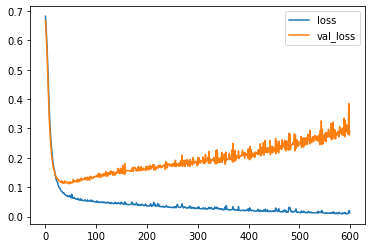

In [27]:
model_loss.plot()

### This is the case of overfitting the data (at start the training loss and validation loss was same but after the some time the validation loss is more)

### This will taken care bu following actions

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [28]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [31]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6567 - val_loss: 0.6280
Epoch 2/600
426/426 [==============================] - 0s 70us/sample - loss: 0.6083 - val_loss: 0.5748
Epoch 3/600
426/426 [==============================] - 0s 69us/sample - loss: 0.5509 - val_loss: 0.5144
Epoch 4/600
426/426 [==============================] - 0s 70us/sample - loss: 0.4979 - val_loss: 0.4600
Epoch 5/600
426/426 [==============================] - 0s 70us/sample - loss: 0.4423 - val_loss: 0.4083
Epoch 6/600
426/426 [==============================] - 0s 70us/sample - loss: 0.3945 - val_loss: 0.3614
Epoch 7/600
426/426 [==============================] - 0s 68us/sample - loss: 0.3526 - val_loss: 0.3200
Epoch 8/600
426/426 [==============================] - 0s 68us/sample - loss: 0.3152 - val_loss: 0.2841
Epoch 9/600
426/426 [==============================] - 0s 66us/sample - loss: 0.2847 - val_loss: 0.2566
Epoch 10/600
426/42

426/426 [==============================] - 0s 79us/sample - loss: 0.0539 - val_loss: 0.1152
Epoch 00078: early stopping


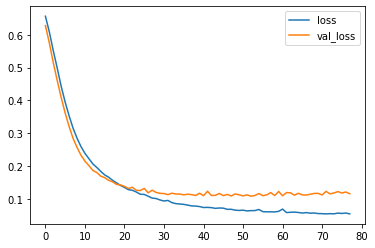

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### From the above plot it is clear that model stops early and then the both the training and validation losses are flat showing no increase in the validation loss and no overfitting of data (ealy stoppping callback works)

### Next we will see how drop out and ealy stop works for the same probelm

## Example Three: Adding in DropOut Layers

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6972 - val_loss: 0.6829
Epoch 2/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6818 - val_loss: 0.6749
Epoch 3/600
426/426 [==============================] - 0s 70us/sample - loss: 0.6695 - val_loss: 0.6667
Epoch 4/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6600 - val_loss: 0.6513
Epoch 5/600
426/426 [==============================] - 0s 74us/sample - loss: 0.6388 - val_loss: 0.6217
Epoch 6/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6306 - val_loss: 0.5952
Epoch 7/600
426/426 [==============================] - 0s 75us/sample - loss: 0.6049 - val_loss: 0.5685
Epoch 8/600
426/426 [==============================] - 0s 78us/sample - loss: 0.5770 - val_loss: 0.5373
Epoch 9/600
426/426 [==============================] - 0s 73us/sample - loss: 0.5519 - val_loss: 0.5056
Epoch 10/600
426/42

426/426 [==============================] - 0s 68us/sample - loss: 0.1499 - val_loss: 0.0964
Epoch 79/600
426/426 [==============================] - 0s 68us/sample - loss: 0.1272 - val_loss: 0.0923
Epoch 80/600
426/426 [==============================] - 0s 71us/sample - loss: 0.1237 - val_loss: 0.0907
Epoch 81/600
426/426 [==============================] - 0s 71us/sample - loss: 0.1442 - val_loss: 0.0899
Epoch 82/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1153 - val_loss: 0.0956
Epoch 83/600
426/426 [==============================] - 0s 74us/sample - loss: 0.1295 - val_loss: 0.0875
Epoch 84/600
426/426 [==============================] - 0s 78us/sample - loss: 0.1523 - val_loss: 0.0883
Epoch 85/600
426/426 [==============================] - 0s 75us/sample - loss: 0.1113 - val_loss: 0.0984
Epoch 86/600
426/426 [==============================] - 0s 77us/sample - loss: 0.1244 - val_loss: 0.0896
Epoch 87/600
426/426 [==============================] - 0s 77us/samp

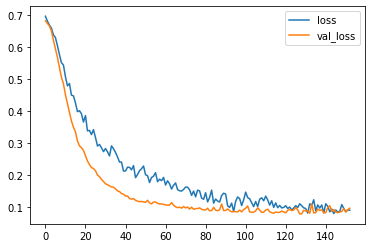

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### The plot shows traning loss and validation loss are quickly going down and remain almost same
### This shows the dropout and early stoppping works in this case

# Model Evaluation

In [37]:
predictions = model.predict_classes(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [40]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]


In [ ]:
# The report shows the model has 98% percentage of accuracy, the model miss classify only 5 point (this is due to we gave balance data)